In [103]:
import pandas as pd

In [104]:
df=pd.read_csv(r'Sales.csv')

In [105]:
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [106]:
# Print the first few rows of the DataFrame
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [107]:
# - Check basic statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)



Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# Data cleaning

In [108]:
#checking wheather the data is available or not recorded.
missing_values = df.isnull().sum()
# Print the missing values (if any)
print("Missing Values:")
print(missing_values)

# You can also print a message based on the result
if missing_values.sum() == 0:
    print("\nNo missing values found. Data is available.")
else:
    print("\nMissing values found. Data may be incomplete or recorded incorrectly.")

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing values found. Data is available.


In [109]:
#Define reasonable ranges for each variable
reasonable_ranges = {
    'TV': (0, 1000),    # Example: TV budget should be between 0 and 1000
    'Radio': (0, 100),   # Example: Radio budget should be between 0 and 100
    'Newspaper': (0, 200),  # Example: Newspaper budget should be between 0 and 200
    'Sales': (0, 100)    # Example: Sales should be between 0 and 100
}

# Step 3: Perform range checks
for column, (min_val, max_val) in reasonable_ranges.items():
    if ((df[column] < min_val) | (df[column] > max_val)).any():
        print(f"Warning: Values in column '{column}' are not within the reasonable range of ({min_val}, {max_val}). Please verify the data.")
    else:
        print(f"The values in the column '{column}' are within the reasonable range of ({min_val},{max_val})")

The values in the column 'TV' are within the reasonable range of (0,1000)
The values in the column 'Radio' are within the reasonable range of (0,100)
The values in the column 'Newspaper' are within the reasonable range of (0,200)
The values in the column 'Sales' are within the reasonable range of (0,100)


In [110]:
#To check whether the data entered is correct or not.
# Checking if sales values are non-negative
if (df['Sales'] < 0).any():
    print("Warning: There are negative sales values. Please verify the data.")
else:
    print("The Data contains non negative sales values")

The Data contains non negative sales values


In [76]:
# Check for negative or unrealistic values
if (df < 0).any().any():
    print(f"Warning: There are negative values in the dataset. Please verify the data.")
else:
    print("No negative values found.")

No negative values found.


In [78]:
# Checking if advertising budgets are non-negative
if (df[['TV', 'Radio', 'Newspaper']] < 0).any().any():
    print("Warning: There are negative advertising budget values. Please verify the data.")
else:
    print("The Data contains non negative advertising budget values")

The Data contains non negative advertising budget values


In [111]:
#to remove duplicate values
df_dup = df.drop_duplicates()
# Display the DataFrame without duplicates
print("DataFrame without Duplicates:")
print(df_dup)

DataFrame without Duplicates:
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [112]:
#Check for outliers and decide whether to remove them or not.
import numpy as np

In [113]:
# Define a function to detect outliers using IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [115]:

# Select the columns you want to check for outliers
columns_to_check = ['TV', 'Radio', 'Newspaper', 'Sales']

In [83]:
# Check for outliers in each column
outliers = df[columns_to_check].apply(detect_outliers)
print(outliers)

        TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]


In [117]:
# Count the number of outliers in each column
num_outliers = outliers.sum()
# Display the number of outliers for each column
print("Number of outliers:")
print(num_outliers)

Number of outliers:
TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64


In [118]:
# Display the rows containing outliers
outliers_rows = df[outliers.any(axis=1)]
print("\nRows containing outliers:")
print(outliers_rows)


Rows containing outliers:
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [119]:
# To remove outliers, you can use something like this:
df_cleaned = df[~outliers.any(axis=1)]
print("\nOutliers removed:")
print(df_cleaned)


Outliers removed:
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[198 rows x 4 columns]


In [120]:
# Extracting the dependent variable 'Sales'
y = df['Sales']
# Printing the first few rows of 'Sales' to verify
print(y.head())

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [121]:
# Extracting the independent variables into a DataFrame
independent_variables = df[['TV', 'Radio', 'Newspaper']]
# Printing the extracted independent variables
print("Independent Variables:")
print(independent_variables)

Independent Variables:
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [122]:
#Bining the data
# Adjust the bin_edges and bin_labels as per your specific requirements
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Step 3: Apply binning to a specific column (e.g., 'Sales')
df['Sales_bin'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# You can choose a different column 
#or adjust bin_edges and bin_labels based on your specific requirements.

# Display the DataFrame with the new binning column
print("DataFrame with Binning:")
print(df)

DataFrame with Binning:
        TV  Radio  Newspaper  Sales Sales_bin
0    230.1   37.8       69.2   22.1     20-30
1     44.5   39.3       45.1   10.4     10-20
2     17.2   45.9       69.3   12.0     10-20
3    151.5   41.3       58.5   16.5     10-20
4    180.8   10.8       58.4   17.9     10-20
..     ...    ...        ...    ...       ...
195   38.2    3.7       13.8    7.6      0-10
196   94.2    4.9        8.1   14.0     10-20
197  177.0    9.3        6.4   14.8     10-20
198  283.6   42.0       66.2   25.5     20-30
199  232.1    8.6        8.7   18.4     10-20

[200 rows x 5 columns]


In [124]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['TV', 'Radio', 'Newspaper']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])
print("Cleaned and Preprocessed DataFrame:")
print(df_cleaned)

Cleaned and Preprocessed DataFrame:
           TV     Radio  Newspaper  Sales
0    0.978697  0.989521   1.932998   22.1
1   -1.199012  1.090705   0.751313   10.4
2   -1.519332  1.535913   1.937901   12.0
3    0.056456  1.225616   1.408349   16.5
4    0.400243 -0.831784   1.403446   17.9
..        ...       ...        ...    ...
195 -1.272932 -1.310720  -0.783407    7.6
196 -0.615864 -1.229773  -1.062892   14.0
197  0.355657 -0.932968  -1.146248   14.8
198  1.606431  1.272836   1.785900   25.5
199  1.002164 -0.980187  -1.033473   18.4

[198 rows x 4 columns]


C:\Users\S.BALAKRISHNAN\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


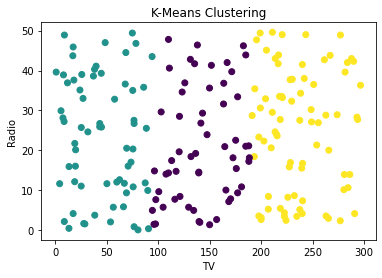

DataFrame with Clusters:
        TV  Radio  Newspaper  Sales Sales_bin  Cluster
0    230.1   37.8       69.2   22.1     20-30        2
1     44.5   39.3       45.1   10.4     10-20        1
2     17.2   45.9       69.3   12.0     10-20        1
3    151.5   41.3       58.5   16.5     10-20        0
4    180.8   10.8       58.4   17.9     10-20        0
..     ...    ...        ...    ...       ...      ...
195   38.2    3.7       13.8    7.6      0-10        1
196   94.2    4.9        8.1   14.0     10-20        0
197  177.0    9.3        6.4   14.8     10-20        0
198  283.6   42.0       66.2   25.5     20-30        2
199  232.1    8.6        8.7   18.4     10-20        2

[200 rows x 6 columns]


In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df
# Replace df with the actual name of your DataFrame if different

# Step 1: Load the dataset (if not already loaded)
# df = pd.read_csv('your_dataset.csv')  # Replace with the actual path if data is in a CSV file

# Step 2: Select the features for clustering (e.g., 'TV', 'Radio', 'Newspaper')
features = df[['TV', 'Radio', 'Newspaper']]

# Step 3: Choose the number of clusters (k)
k = 3  # Adjust based on your specific analysis

# Step 4: Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Step 5: Visualize the clusters (for 2D visualization)
plt.scatter(df['TV'], df['Radio'], c=df['Cluster'], cmap='viridis')
plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('K-Means Clustering')
plt.show()

# The above visualization assumes 'TV' and 'Radio' as features. You can adjust based on your specific features.

# Step 6: Optional - Perform further analysis on the clusters
# You can analyze the clusters further to understand their characteristics.

# Display the DataFrame with cluster assignments
print("DataFrame with Clusters:")
print(df)
